# DIABETES PREDICTION

## BUSINESS UNDERSTANDING

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection diagnostic measurements from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2

__OBJECTIVE__:

The objective of this project is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. 

__Hypothesis__
+ Null Hypothesis (H0): There is no significant difference in mean glucose levels between individuals with and without diabetes.
+ Alternative Hypothesis (H1): Individuals with diabetes have higher mean glucose levels compared to those without diabetes.

In [1]:
# Load the necessary packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import SGDClassifier
import joblib
import os


# visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# DATA UNDERSTANDING

In [2]:
# load dataset
data = pd.read_csv('dataset.csv')

# preview data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


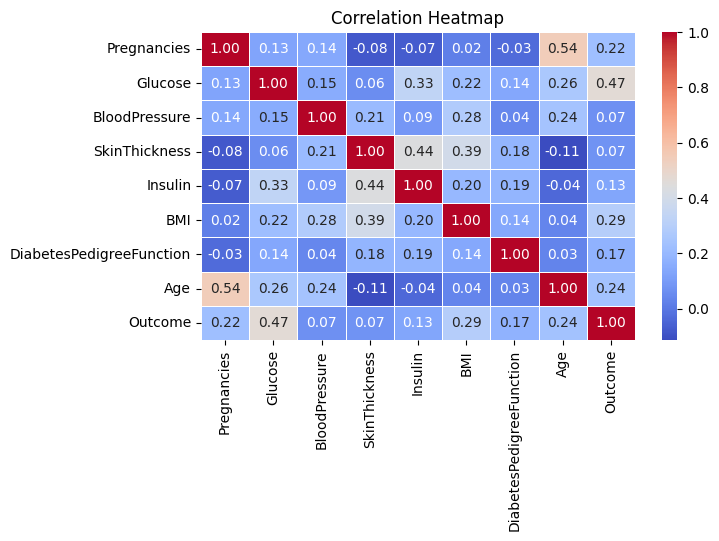

In [5]:
heatmap = data.corr()

# Create a heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

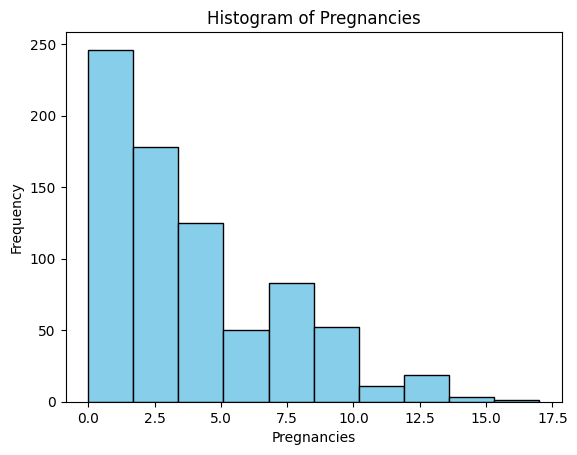

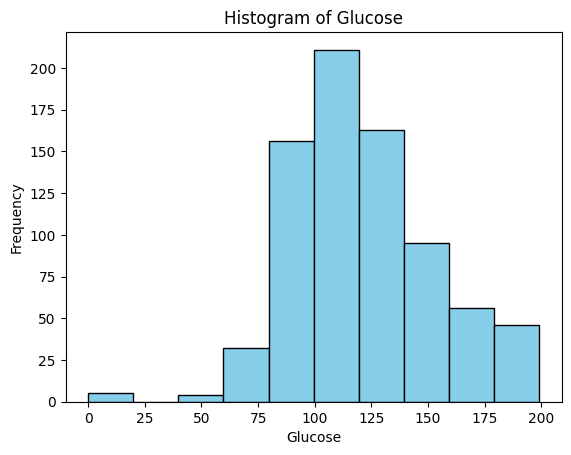

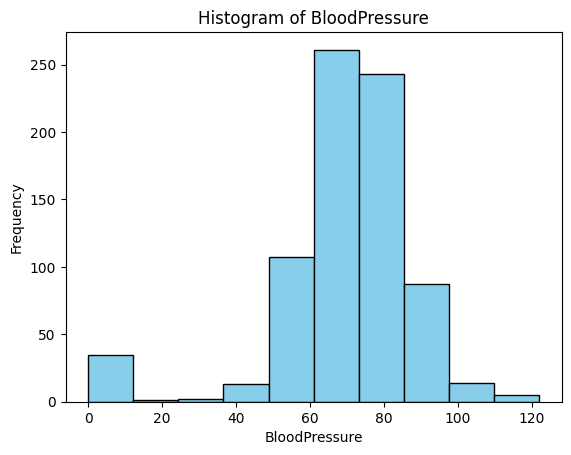

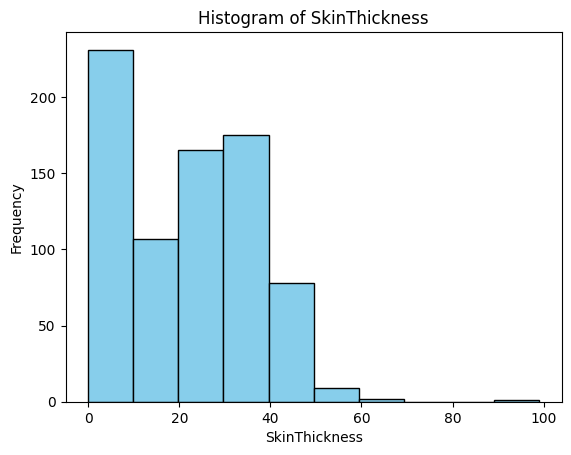

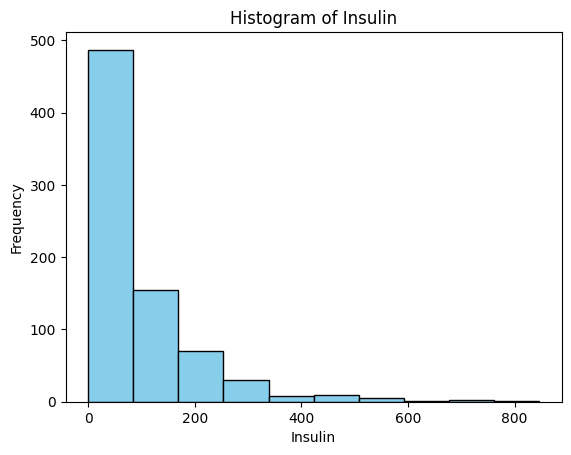

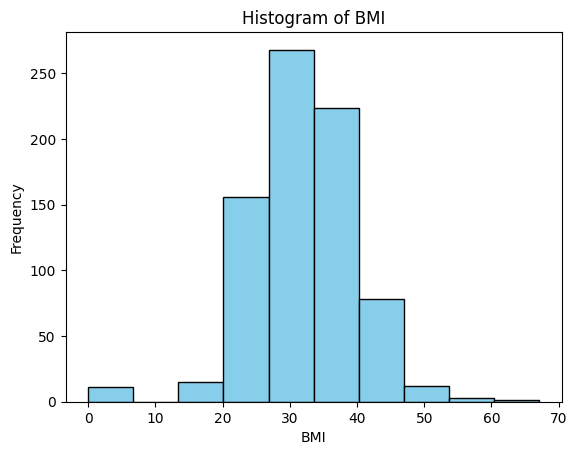

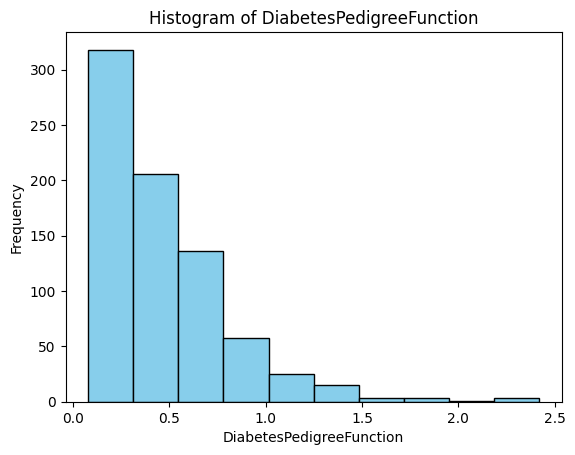

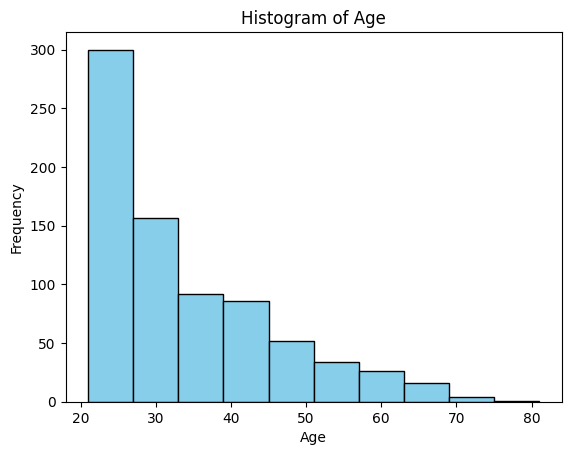

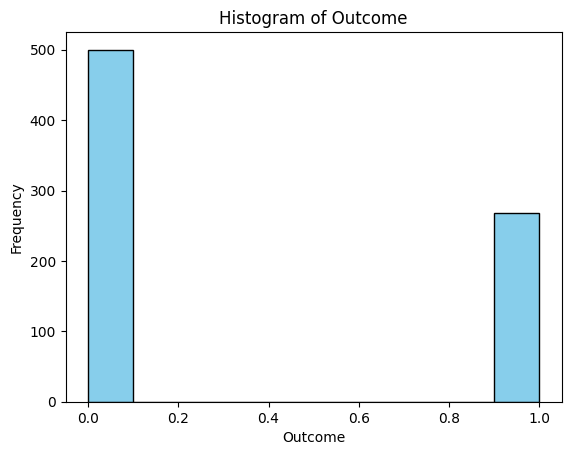

In [6]:
# Histogram for columns
# iterate over each column and plot histogram
for col in data.columns:
    plt.hist(data[col], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

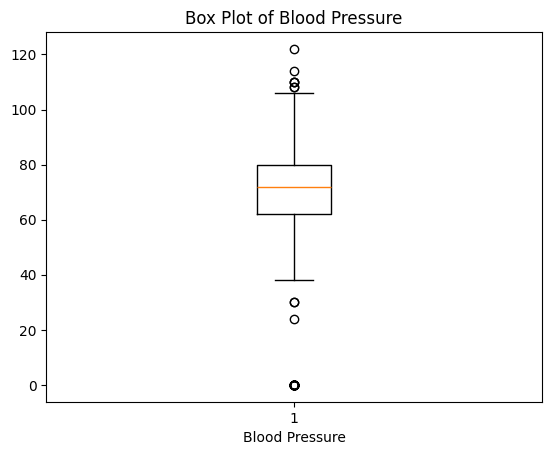

In [7]:
# Box plot for BloodPressure
plt.boxplot(data['BloodPressure'])
plt.xlabel('Blood Pressure')
plt.title('Box Plot of Blood Pressure')
plt.show()

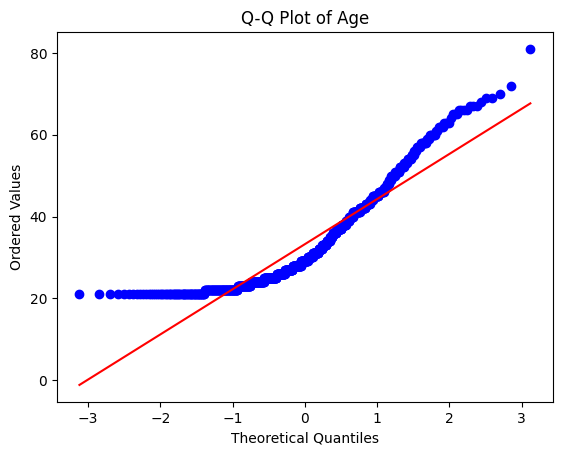

In [8]:
import scipy.stats as stats
# Q-Q plot for a single variable
stats.probplot(data['Age'], dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Age')
plt.show()

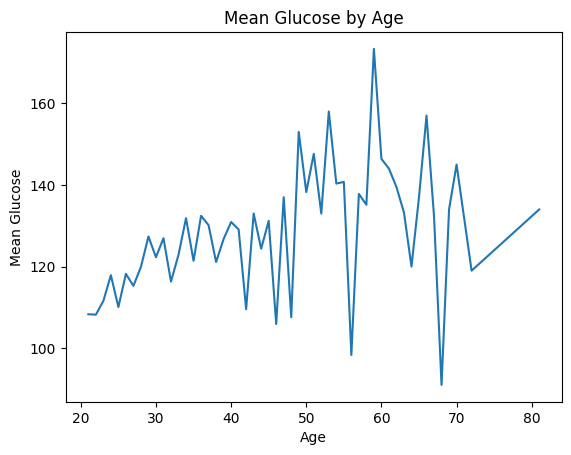

In [9]:
# Line plot for two continuous variables
data.groupby('Age')['Glucose'].mean().plot()
plt.xlabel('Age')
plt.ylabel('Mean Glucose')
plt.title('Mean Glucose by Age')
plt.show()


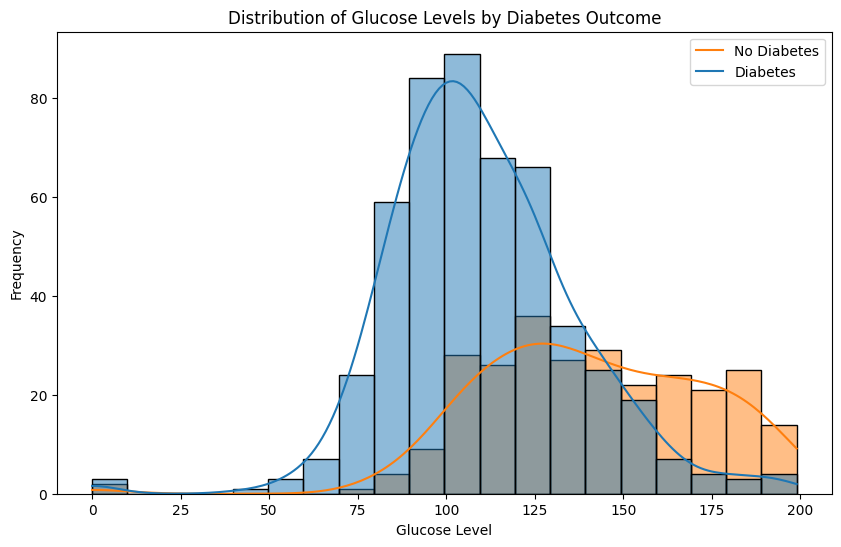

In [10]:
# Distribution of glucose levels for individuals with and without diabetes

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Glucose', hue='Outcome', bins=20, kde=True)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

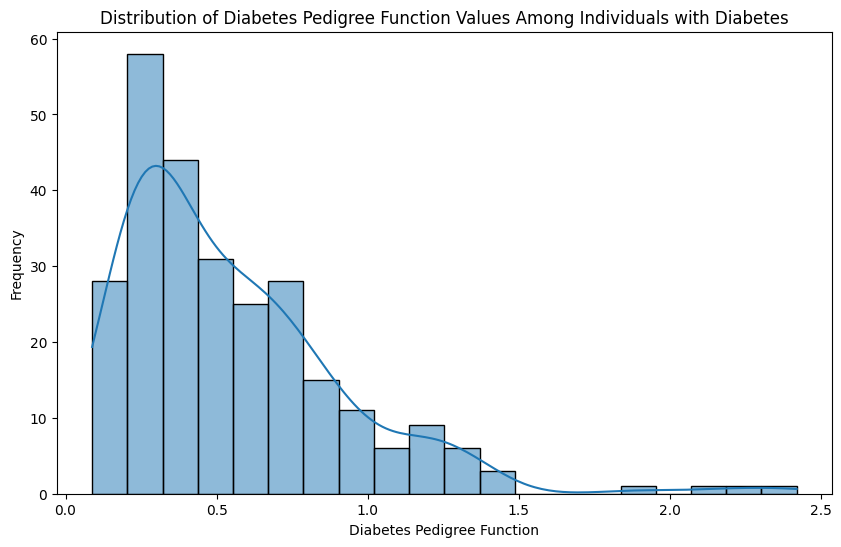

In [11]:
# Distribution of diabetes pedigree function values for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['Outcome'] == 1], x='DiabetesPedigreeFunction', bins=20, kde=True)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Pedigree Function Values Among Individuals with Diabetes')
plt.show()


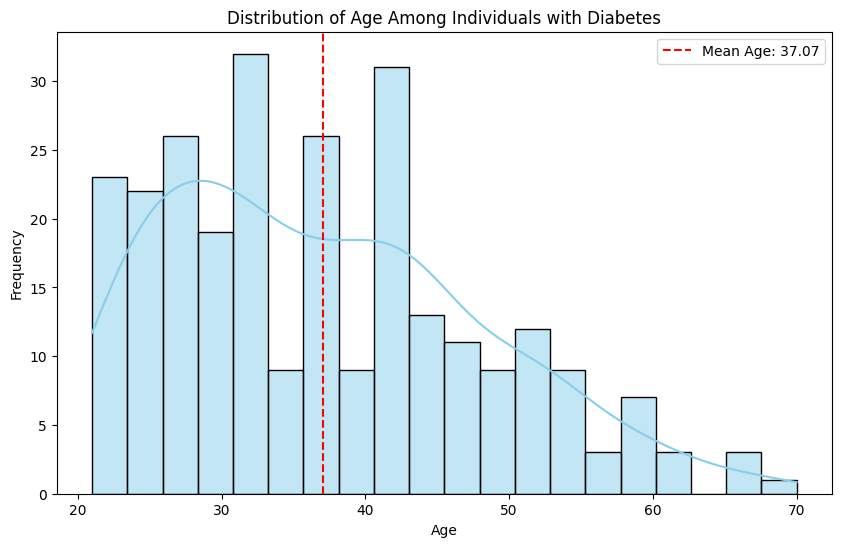

In [12]:

# Filter data for individuals with diabetes
diabetes_data = data[data['Outcome'] == 1]
mean_age_diabetes = data[data['Outcome'] == 1]['Age'].mean()
# Visualize the distribution of age for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Among Individuals with Diabetes')
plt.axvline(mean_age_diabetes, color='red', linestyle='--', label=f'Mean Age: {mean_age_diabetes:.2f}')
plt.legend()
plt.show()

__Hypothesis__
+ Null Hypothesis (H0): There is no significant difference in mean glucose levels between individuals with and without diabetes.
+ Alternative Hypothesis (H1): Individuals with diabetes have higher mean glucose levels compared to those without diabetes.

In [13]:
# Extract glucose levels for individuals with and without diabetes
glucose_diabetes = data[data['Outcome'] == 1]['Glucose']
glucose_no_diabetes = data[data['Outcome'] == 0]['Glucose']

In [14]:
# Independent Samples t-test
t_statistic, p_value_ttest = stats.ttest_ind(glucose_diabetes, glucose_no_diabetes)
print("Independent Samples t-test:")
print(f"T-statistic: {t_statistic}, p-value: {p_value_ttest}")

alpha = 0.05
if p_value_ttest < alpha:
    print("Reject the null hypothesis (H0)")
    print("Conclusion: There is a significant difference in mean glucose levels between individuals with and without diabetes.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is no significant difference in mean glucose levels between individuals with and without diabetes.")


Independent Samples t-test:
T-statistic: 14.600060005973894, p-value: 8.935431645289912e-43
Reject the null hypothesis (H0)
Conclusion: There is a significant difference in mean glucose levels between individuals with and without diabetes.


# DATA PREPARATION

In [15]:
# replace outcome with Diabetic
data = data.rename(columns={'Outcome':'Diabetic'})

# MODELING AND EVALUATION

__Split dataset into predict and target variables__

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetic                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# split data into X and y variables
X = data.drop(columns=['Diabetic'])
y = data['Diabetic']

__Split data into train and test data__

In [18]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
features = X.columns

features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

__Create preprocessor__

In [71]:
#create preprocessor with Transformation to be applied to data
preprocessor = ColumnTransformer(
    transformers=[
        # ('scaler',RobustScaler,features),
        ('log_transformation', FunctionTransformer(np.log1p),features)
    ]
)

__Create a list of models to be trained__

In [68]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42))
]

In [63]:
# view nodels
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)


In [72]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}


#loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
     ('preprocessor',preprocessor),
    ('feature importance',SelectKBest(mutual_info_classif,k='all')),
    ('classifier',model)
    ])

    #fit train data to pipeline
    pipeline.fit(X_train,y_train)

    # make prediction on the test set
    y_pred = pipeline.predict(X_test)
   
    # store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict= True)

    #save each pipeline in the loop in the dictionary
    pipelines[model_name]= pipeline

    # get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
metrics_table.sort_values('F1_Score',ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
1,Logistic Regression,0.759740,0.753709,0.759740,0.750633
0,Random Forest,0.753247,0.747370,0.753247,0.748122
4,Tree-based (Decision Tree),0.727273,0.718228,0.727273,0.717946
2,Support Vector Machine,0.688312,0.671563,0.688312,0.656827
3,K-Nearest Neighbors,0.636364,0.639511,0.636364,0.637833


In [75]:
from sklearn.metrics import roc_auc_score

# Create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score', 'AUC'])

# Initialize dictionary to store pipelines
pipelines = {}

# Loop and train models
for model_name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', model)
    ])

    # Fit train data to pipeline
    pipeline.fit(X_train, y_train)

    # Make prediction on the test set
    y_pred = pipeline.predict(X_test)

    # Compute probabilities for the positive class
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_proba)

    # Store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Save each pipeline in the loop in the dictionary
    pipelines[model_name] = pipeline

    # Get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1, auc]

# Sort values by F1 score in descending order
metrics_table.sort_values('F1_Score', ascending=False)



,Model Name,Precision,Recall,Accuracy,F1_Score,AUC
1,Logistic Regression,0.759740,0.753709,0.759740,0.750633,0.834444
0,Random Forest,0.753247,0.747370,0.753247,0.748122,0.818519
4,Tree-based (Decision Tree),0.727273,0.718228,0.727273,0.717946,0.675000
2,Support Vector Machine,0.688312,0.671563,0.688312,0.656827,0.765648
3,K-Nearest Neighbors,0.636364,0.639511,0.636364,0.637833,0.661759


In [56]:

# Get selected features
selected_features_mask = pipeline.named_steps['feature importance'].get_support()
selected_features = X_train.columns[selected_features_mask]

print(f"Important features for {model_name}:")
print(selected_features)

Important features for Stochastic Gradient Descent:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
